### Imports and Installations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Analyze output of actuated simulation 
Timesteps 25200 - 34200

In [3]:
pd.set_option('display.max_columns', None)

In [13]:
df = pd.read_csv('../src/data/actuated_output/actuated_output_9000steps_moreInfo.csv')
df

,Step,num_vehicles,vehicle_types,avg_speed,localCO2Emission,localCOEmission,localHCEmission,localPMxEmission,localNOxEmission,local_fuel_consumption,localNoiseEmission,localWaitingTime,localStoppedVehicles,totalCO2Emission,totalCOEmission,totalHCEmission,totalPMxEmission,totalNOxEmission,totalFuelConsumption,totalNoiseEmission,totalWaitingTime,totalStoppedVehicles,tls159_phase,tls159_phase_duration,tls159_state,tls160_phase,tls160_phase_duration,tls160_state,tls161_phase,tls161_phase_duration,tls161_state
0,25200,0,[],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,1.123389e+04,359.172222,1.453889,2.442333,86.401389,3.550833e+03,178.991223,0.0,4,0,10.0,rrrrggggrrrrrrrgggrg,0,4.0,rrrrrrrrrrrgrrrrgrggrrg,0,3.0,rrrrrrrrrrrrrrr
1,25201,0,[],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,2.186324e+04,666.801335,3.018414,2.957748,97.425541,6.936337e+03,271.159876,0.0,1,0,10.0,rrrrggggrrrrrrrgggrg,0,4.0,rrrrrrrrrrrgrrrrgrggrrg,0,3.0,rrrrrrrrrrrrrrr
2,25202,0,[],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,3.250170e+04,924.722737,4.318140,3.586446,120.598029,1.031744e+04,335.695376,0.0,1,0,10.0,rrrrggggrrrrrrrgggrg,0,4.0,rrrrrrrrrrrgrrrrgrggrrg,0,3.0,rrrrrrrrrrrrrrr
3,25203,0,[],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,5.051227e+04,1100.544598,5.200979,6.431233,241.016657,1.601038e+04,463.885510,1.0,3,0,10.0,rrrrggggrrrrrrrgggrg,0,4.0,rrrrrrrrrrrgrrrrgrggrrg,1,9.0,rrrrrrgggggrrgg
4,25204,0,[],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,5.765308e+04,1096.456427,5.319689,6.791613,271.803409,1.827040e+04,538.493184,0.0,2,0,10.0,rrrrggggrrrrrrrgggrg,1,4.0,rrrrrrrrrrrgrrrrgrgyrrg,1,9.0,rrrrrrgggggrrgg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,34195,38,"['bus', 'DEFAULT_VEHTYPE', 'DEFAULT_VEHTYPE', ...",0.226243,110431.666667,4380.391667,25.960556,14.765833,516.510000,35047.222222,655.847704,3141.0,37,5.788134e+06,137722.796548,719.416874,851.741298,34027.275633,1.832296e+06,82597.281980,62801.0,1091,22,31.0,rrrrggggrrrrrrrgggrg,28,35.0,rrrrrrrrrrrgrrrrgrggrrg,15,29.0,rrrrrrrrrrrrrrr
8996,34196,38,"['bus', 'DEFAULT_VEHTYPE', 'DEFAULT_VEHTYPE', ...",0.147296,110431.666667,4380.391667,25.960556,14.765833,516.510000,35047.222222,655.847704,3178.0,37,5.727602e+06,138064.364180,708.921066,845.966421,33559.874492,1.813223e+06,82569.476849,63212.0,1081,22,31.0,rrrrggggrrrrrrrgggrg,28,35.0,rrrrrrrrrrrgrrrrgrggrrg,15,29.0,rrrrrrrrrrrrrrr
8997,34197,38,"['bus', 'DEFAULT_VEHTYPE', 'DEFAULT_VEHTYPE', ...",0.068349,110431.666667,4380.391667,25.960556,14.765833,516.510000,35047.222222,655.847704,3215.0,37,5.544982e+06,137742.597187,708.037996,829.195985,32486.840101,1.755576e+06,82407.226339,63880.0,1089,22,31.0,rrrrggggrrrrrrrgggrg,28,35.0,rrrrrrrrrrrgrrrrgrggrrg,15,29.0,rrrrrrrrrrrrrrr
8998,34198,38,"['bus', 'DEFAULT_VEHTYPE', 'DEFAULT_VEHTYPE', ...",0.000000,110431.666667,4380.391667,25.960556,14.765833,516.510000,35047.222222,655.847704,3253.0,38,5.706132e+06,139277.289512,711.131175,842.634931,33225.130413,1.806594e+06,82559.416131,64726.0,1095,22,31.0,rrrrggggrrrrrrrgggrg,28,35.0,rrrrrrrrrrrgrrrrgrggrrg,15,29.0,rrrrrrrrrrrrrrr


In [14]:
# drop all rows that do not contain any vehicles on the controlled lanes
df = df[df['num_vehicles'] != 0]

In [15]:
df

,Step,num_vehicles,vehicle_types,avg_speed,localCO2Emission,localCOEmission,localHCEmission,localPMxEmission,localNOxEmission,local_fuel_consumption,localNoiseEmission,localWaitingTime,localStoppedVehicles,totalCO2Emission,totalCOEmission,totalHCEmission,totalPMxEmission,totalNOxEmission,totalFuelConsumption,totalNoiseEmission,totalWaitingTime,totalStoppedVehicles,tls159_phase,tls159_phase_duration,tls159_state,tls160_phase,tls160_phase_duration,tls160_state,tls161_phase,tls161_phase_duration,tls161_state
54,25254,1,['truck_truck'],12.592482,13171.191093,20.658814,0.000000,2.585710,115.470947,4143.077788,74.728693,0.0,0,3.641486e+05,4971.984781,25.269819,42.143144,1797.368993,1.153479e+05,4725.291317,207.0,18,13,4.0,gggrrrrryyrrrrrrrrgr,19,14.0,rggggrgggggrrrrrggrrrrg,11,52.0,ggggggrrrrrrgrr
55,25255,1,['truck_truck'],12.778826,18283.643858,26.326148,0.000000,3.197964,155.194196,5751.372791,75.648107,0.0,0,3.564159e+05,4939.008221,25.401539,40.467850,1674.916753,1.129560e+05,4773.404465,222.0,16,13,4.0,gggrrrrryyrrrrrrrrgr,19,14.0,rggggrgggggrrrrrggrrrrg,11,52.0,ggggggrrrrrrgrr
56,25256,1,['truck_truck'],12.508273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.737433,0.0,0,4.141146e+05,5131.380249,25.692643,50.512401,2218.331258,1.310731e+05,4878.653113,232.0,15,14,1.0,gggrrrrrrrrrrrrrrrgr,19,14.0,rggggrgggggrrrrrggrrrrg,11,52.0,ggggggrrrrrrgrr
57,25257,1,['truck_truck'],12.419669,11265.274973,18.554054,0.000000,2.360105,100.782449,3543.509296,74.328315,0.0,0,4.489196e+05,4864.405878,24.258262,56.730092,2523.946660,1.420181e+05,5011.873571,246.0,16,15,22.0,gggrrrrrrrgggggrrrgg,19,14.0,rggggrgggggrrrrrggrrrrg,11,52.0,ggggggrrrrrrgrr
58,25258,1,['truck_truck'],12.816416,23616.040062,32.249457,0.000000,3.840568,196.808849,7428.861348,76.567583,0.0,0,3.915672e+05,4614.813851,22.744446,47.916278,2144.121823,1.239024e+05,5056.981624,261.0,17,15,22.0,gggrrrrrrrgggggrrrgg,19,14.0,rggggrgggggrrrrrggrrrrg,11,52.0,ggggggrrrrrrgrr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,34195,38,"['bus', 'DEFAULT_VEHTYPE', 'DEFAULT_VEHTYPE', ...",0.226243,110431.666667,4380.391667,25.960556,14.765833,516.510000,35047.222222,655.847704,3141.0,37,5.788134e+06,137722.796548,719.416874,851.741298,34027.275633,1.832296e+06,82597.281980,62801.0,1091,22,31.0,rrrrggggrrrrrrrgggrg,28,35.0,rrrrrrrrrrrgrrrrgrggrrg,15,29.0,rrrrrrrrrrrrrrr
8996,34196,38,"['bus', 'DEFAULT_VEHTYPE', 'DEFAULT_VEHTYPE', ...",0.147296,110431.666667,4380.391667,25.960556,14.765833,516.510000,35047.222222,655.847704,3178.0,37,5.727602e+06,138064.364180,708.921066,845.966421,33559.874492,1.813223e+06,82569.476849,63212.0,1081,22,31.0,rrrrggggrrrrrrrgggrg,28,35.0,rrrrrrrrrrrgrrrrgrggrrg,15,29.0,rrrrrrrrrrrrrrr
8997,34197,38,"['bus', 'DEFAULT_VEHTYPE', 'DEFAULT_VEHTYPE', ...",0.068349,110431.666667,4380.391667,25.960556,14.765833,516.510000,35047.222222,655.847704,3215.0,37,5.544982e+06,137742.597187,708.037996,829.195985,32486.840101,1.755576e+06,82407.226339,63880.0,1089,22,31.0,rrrrggggrrrrrrrgggrg,28,35.0,rrrrrrrrrrrgrrrrgrggrrg,15,29.0,rrrrrrrrrrrrrrr
8998,34198,38,"['bus', 'DEFAULT_VEHTYPE', 'DEFAULT_VEHTYPE', ...",0.000000,110431.666667,4380.391667,25.960556,14.765833,516.510000,35047.222222,655.847704,3253.0,38,5.706132e+06,139277.289512,711.131175,842.634931,33225.130413,1.806594e+06,82559.416131,64726.0,1095,22,31.0,rrrrggggrrrrrrrgggrg,28,35.0,rrrrrrrrrrrgrrrrgrggrrg,15,29.0,rrrrrrrrrrrrrrr


In [21]:
df[['localCO2Emission','localCOEmission','localHCEmission','localPMxEmission','localNOxEmission','localNoiseEmission', 'local_fuel_consumption']].mean()

localCO2Emission          146673.261938
localCOEmission             4307.526404
localHCEmission               23.416198
localPMxEmission              23.784859
localNOxEmission             890.308086
localNoiseEmission           661.163210
local_fuel_consumption     46448.954845
dtype: float64

In [4]:
df_ppo.CO2_emissions.describe()

count      1800.000000
mean      79731.322665
std       37847.394858
min           0.000000
25%       58686.117924
50%       82708.463934
75%      106940.187146
max      200804.083972
Name: CO2_emissions, dtype: float64

### Phase Transitions

In [26]:
# Define the possible states for each traffic light
tls_159_states = ["GGGgrrrrrrgGgGGrrrGG",
        "GGGgrrrrrrgGgGGrrrrr",
        "yyygrrrrrryyyyyrrrrr",
        "GGGGrrrrrrrrrrrrrrrr",
        "yyyyrrrrrrrrrrrrrrrr",
        "rrrrgGGGrrrrrrrGGGrG",
        "rrrrgGGGrrrrrrrGrrrr",
        "rrrryyyyrrrrrrryrrrr",
        "rrrrrrrrggrrrrrrGGGr",
        "rrrrrrrrggrrrrrrrrrr",
        "rrrrrrrryyrrrrrrrrrr"]

tls_160_states = ["rgGgGrrrrrrrrrrrGGrGGrG",
        "rgGgGrrrrrrrrrrrrrrrrrr",
        "ryyyyrrrrrrrrrrrrrrrrrr",
        "rrrrrgrrrrrrggGGGGGrGGr",
        "rrrrrgrrrrrrggGGrrrrrrr",
        "rrrrryrrrrrryyyyrrrrrrr",
        "grrrrrGGgGGgrrrrrGGrrGG",
        "grrrrrGGgGGgrrrrrrrrrrr",
        "grrrrryyyyyyrrrrrrrrrrr",
        "Grrrrrrrrrrrrrrrrrrrrrr",
        "yrrrrrrrrrrrrrrrrrrrrrr"]

tls_161_states = ["yyyyyyryyyrrrrrrrrrrrry",
        "rrrrrrrrrrrrrrrrrrrrrry",
        "rrrrrrrrrrrrrrrrrrrrrrr",
        "ggggggggggrrggggggggggg",
        "rrrrrrryrryyrrrrrryyrrr",
        "rrrrrrrgrrggrrrrrrggrrr",
        "rrrrrrrrrrrrrrrrrryyrrr",
        "rrrrrrrrrrrrrrrrrrrrrrr",
        "yyyyyyyryyrrrrrrrrrrgrr",
        "gggggggrggrrrrrrrrrrgrr",
        "ggggggggggrrrrrrrrrrgry",
        "ggggggggggrrrrrrrrrrgrg",
        "ggggggyryyrrrrrrrrrrrrg",
        "yyyyyyrrrrrrrrrrrrrrrrg",
        "yyyyyyrrrrrrrrrrrrrrrry"]

In [34]:
df.tls160_state

54      rggggrgggggrrrrrggrrrrg
55      rggggrgggggrrrrrggrrrrg
56      rggggrgggggrrrrrggrrrrg
57      rggggrgggggrrrrrggrrrrg
58      rggggrgggggrrrrrggrrrrg
                 ...           
8995    rrrrrrrrrrrgrrrrgrggrrg
8996    rrrrrrrrrrrgrrrrgrggrrg
8997    rrrrrrrrrrrgrrrrgrggrrg
8998    rrrrrrrrrrrgrrrrgrggrrg
8999    rrrrrrrrrrrgrrrrgrggrrg
Name: tls160_state, Length: 8946, dtype: object

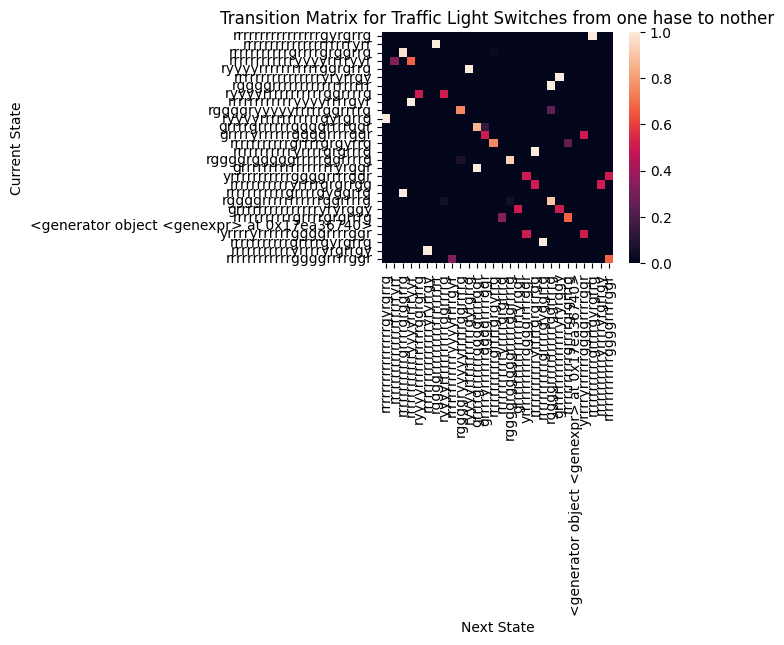

In [36]:
# create transition matrix and plot heatmap

def transition_matrix(transitions, num_phases):
    phases = list(set(phase for transition in transitions for phase in transition))
    phase_to_index = {phase: index for index, phase in enumerate(phases)}
    matrix = [[0] * num_phases for _ in range(num_phases)]
    for (phase1, phase2) in transitions:
        i = phase_to_index[phase1]
        j = phase_to_index[phase2]
        matrix[i][j] += 1
    return matrix

def normalize_matrix(matrix):
        for row in matrix:
            total = sum(row)
            if total > 0:  # Avoid division by zero
                row[:] = [f/total for f in row]
        return matrix

def create_heatmap(matrix, states):
    plt.figure(figsize=(4, 3))  # adjust the size as needed
    sns.heatmap(matrix,square=True, xticklabels=states, yticklabels=states)
    plt.xlabel("Next State")
    plt.ylabel("Current State")
    plt.title("Transition Matrix for Traffic Light Switches from one hase to nother")
    plt.show()

# append all states collected during training to list
tls_160_allStates = df['tls160_state'].tolist()
tls_160_allStates.append(x for x in set(tls_160_states) if x not in tls_160_allStates)

# get number of distinct phases
num_phases = len(set(tls_160_allStates))

# create list of tuples for state transitions
transitions = [(tls_160_allStates[i], tls_160_allStates[i+1]) for i in range(len(tls_160_allStates)-1)]

# create transition matrix
matrix = transition_matrix(transitions, num_phases)

# normalize matrix
transition_matrix = normalize_matrix(matrix)  # assuming you already have the transition matrix

# plot heatmap
create_heatmap(transition_matrix, set(tls_160_allStates))

In [35]:
set(tls_160_allStates)

{<generator object <genexpr> at 0x1579ba2e0>,
 'grrrrgrrrrrrggggrrrrggr',
 'grrrrrrrrrrrrrrrrryrggr',
 'grrrrrrrrrrrrrrryryrggy',
 'grrrryrrrrrrggggrrrrggr',
 'rggggrgggggrrrrrggrrrrg',
 'rggggrrrrrrrrrrrggrrrrg',
 'rggggrrrrrrrrrrrrrrrrrr',
 'rggggryyyyyrrrrrggrrrrg',
 'rrrrrrrrrrrgrrrrgrggrrg',
 'rrrrrrrrrrrgrrrrgrgrrrg',
 'rrrrrrrrrrrgrrrrgrgyrrg',
 'rrrrrrrrrrrgrrrrgyggrrg',
 'rrrrrrrrrrrgrrrrgyrgrrg',
 'rrrrrrrrrrrrggggrrrrggr',
 'rrrrrrrrrrrrrrrrgyrgrrg',
 'rrrrrrrrrrrrrrrrrrrryrr',
 'rrrrrrrrrrrrrrrryryrrgy',
 'rrrrrrrrrrrryyyyrrrrgyr',
 'rrrrrrrrrrrryyyyrrrryyr',
 'rrrrrrrrrrryrrrrgrgrrgg',
 'rrrrrrrrrrryrrrrgrgrrrg',
 'rrrrrrrrrrryrrrryrgrrgy',
 'ryyyyrrrrrrrrrrrggrgrrg',
 'ryyyyrrrrrrrrrrrggrrrrg',
 'ryyyyrrrrrrrrrrrgyrgrrg',
 'yrrrrrrrrrrrggggrrrrggr',
 'yrrrryrrrrrrggggrrrrggr'}

In [31]:
len(tls_160_states)

11